In [1]:
# check version
from pycaret.utils import version
version()

'2.3.1'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
final = pd.read_csv('final.csv')

In [4]:
final.head()

,Unnamed: 0,power,humidity,temperature,water_reading,co2,year,month,day,hour
0,0,21.000000,40.0,22.40,0.0,515.0,2021,11,19,15
1,1,21.500000,39.5,22.42,0.0,515.0,2021,11,19,16
2,2,198.200000,39.0,22.42,0.0,488.0,2021,11,19,16
3,3,21.454545,38.5,22.32,0.0,460.0,2021,11,19,17
4,4,21.357143,38.0,22.12,0.0,449.0,2021,11,19,17


In [6]:
from pycaret.regression import *
reg1 = setup(final, target = 'power', session_id=123, log_experiment=True, experiment_name='test')

,Description,Value
0,session_id,123
1,Target,power
2,Original Data,"(311, 10)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(217, 15)"


In [7]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
llar,Lasso Least Angle Regression,53.3855,5314.9782,72.5327,-0.0162,0.9819,1.3751,0.0020
br,Bayesian Ridge,53.3907,5316.0114,72.5398,-0.0164,0.9820,1.3752,0.0020
omp,Orthogonal Matching Pursuit,52.8705,5434.1746,73.4534,-0.0463,0.9914,1.3464,0.0040
en,Elastic Net,54.0416,5467.2949,73.5838,-0.0468,0.9973,1.3920,0.0040
lasso,Lasso Regression,53.5438,5498.1323,73.7963,-0.0534,0.9974,1.3742,0.1300
ridge,Ridge Regression,53.9789,5608.9997,74.5271,-0.0743,1.0110,1.4045,0.0020
lr,Linear Regression,54.0923,5657.0294,74.8394,-0.0832,1.0189,1.4118,0.2820
huber,Huber Regressor,20.2430,3687.6122,46.7061,-0.1350,0.5650,0.1104,0.1300
knn,K Neighbors Regressor,49.9446,6046.1948,77.5780,-0.1749,1.0633,1.2093,0.0040
lar,Least Angle Regression,56.8093,6129.8128,77.7557,-0.1822,1.0582,1.5455,0.1280


In [8]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [11]:
huber = create_model('huber')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.0821,4549.3423,67.4488,-0.2857,0.9417,0.2037
1,21.3302,4899.8591,69.9990,-0.1010,0.7347,0.0961
2,20.7263,3116.4411,55.8251,-0.1555,0.7535,0.1269
3,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
4,42.3037,6598.5175,81.2313,-0.3649,1.0741,0.2479
5,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
6,25.8042,4905.2515,70.0375,-0.1546,0.8254,0.1298
7,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000
8,37.6703,5934.5091,77.0358,-0.3068,1.0127,0.2171
9,46.2556,10508.0157,102.5086,-0.2506,1.0841,0.2198


In [13]:
tuned_huber = tune_model(huber, n_iter=50, optimize = 'MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,32.0781,4550.7567,67.4593,-0.2861,0.9422,0.2033
1,21.3332,4898.6906,69.9906,-0.1008,0.7342,0.0963
2,20.7413,3116.9744,55.8299,-0.1557,0.7537,0.1276
3,24.2882,7391.4632,85.9736,-0.0819,0.7475,0.1066
4,42.2953,6599.0317,81.2344,-0.3650,1.0742,0.2474
5,24.2793,4161.9698,64.5133,-0.1550,0.7974,0.1442
6,25.8090,4907.1917,70.0514,-0.1550,0.8260,0.1298
7,55.7169,11665.5694,108.0073,-0.3545,1.1958,0.2742
8,37.6686,5934.1185,77.0332,-0.3067,1.0127,0.2171
9,46.2490,10510.1201,102.5189,-0.2508,1.0844,0.2194


In [14]:
tuned_huber

HuberRegressor(alpha=0.9, epsilon=1, fit_intercept=False, max_iter=100,
               tol=1e-05, warm_start=False)

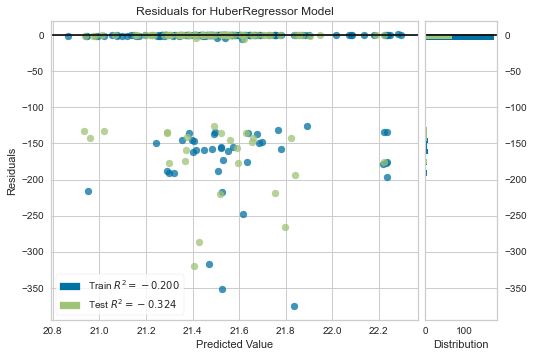

In [17]:
plot_model(tuned_huber)

In [31]:
#plot_model(tuned_huber, plot = 'error')

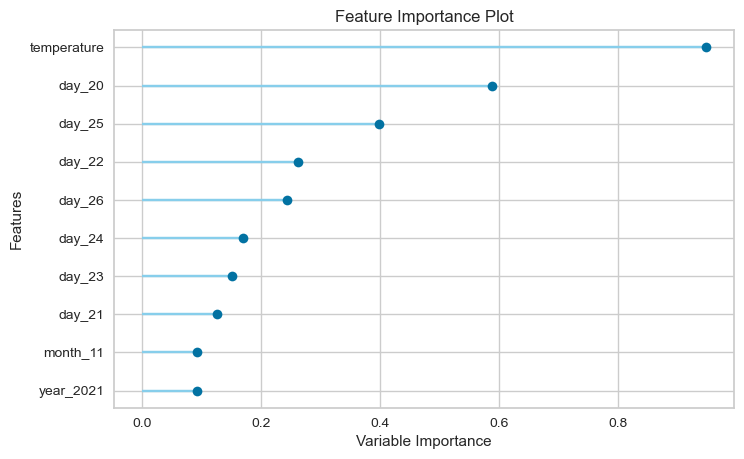

In [20]:
plot_model(tuned_huber, plot = 'feature')

In [30]:
stacker = stack_models(estimator_list = compare_models(n_select=5, fold = 5))

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,48.0994,3668.8310,60.5709,-0.0369,0.9518,1.2308
1,45.5160,5416.3839,73.5961,-0.2171,1.0370,1.2697
2,49.5583,3444.3828,58.6889,-0.2771,1.0327,1.6543
3,56.7092,8008.8801,89.4923,-0.1723,1.0985,1.6871
4,59.6816,5520.4575,74.2998,-0.1419,1.0795,1.3946
5,44.0166,3763.8123,61.3499,-0.0445,0.9167,1.2378
6,46.0737,4348.9685,65.9467,-0.0236,0.9259,1.2500
7,70.0036,9774.8396,98.8678,-0.1350,1.1025,1.2178
8,65.5426,6449.5681,80.3092,-0.4202,1.2201,1.7735
9,57.1499,9721.6297,98.5983,-0.1570,1.0675,0.9456


In [32]:
result = predict_model(tuned_huber)
result.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,46.2121,8626.3836,92.8783,-0.3236,1.1062,0.2469


,humidity,temperature,water_reading,co2,hour,year_2021,month_11,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,power,Label
0,23.5,21.690001,0.000000,508.0,12.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,21.000000,21.857911
1,37.0,21.500000,0.000000,441.0,21.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.299999,21.233176
2,31.5,20.840000,0.000000,418.0,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21.153847,21.277857
3,20.5,22.000000,0.261667,433.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,178.454544,21.589986
4,26.5,21.879999,0.000000,401.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,241.500000,21.519800
